	Data Manipulation:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#a.Extract the 5th column & store it in ‘customer_5’

customer_5 = df.iloc[:,4] 
customer_5.head()

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

In [8]:
#b.Extract the 15th column & store it in ‘customer_15’

customer_15 = df.iloc[:,14]
customer_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [9]:
senior_male_electronic = df[(df['gender'] == 'Male') & (df['SeniorCitizen'] == 1)
                            & (df['PaymentMethod']== 'Electronic check')]
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [10]:
customer_total_tenure = df[(df['tenure'] > 70) | (df['MonthlyCharges'] > 100)]
customer_total_tenure.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
17,9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No
28,5248-YGIJN,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
35,6234-RAAPL,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),99.90,7251.7,No
38,5380-WJKOV,Male,0,No,No,34,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.35,3549.25,Yes


In [11]:
two_mail_yes = df[(df['Contract'] == 'Two year') & (df['PaymentMethod'] == 'Mailed check') 
                  & (df['Churn'] == 'Yes')]
two_mail_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [12]:
customer_333 = df.sample(n=333)
customer_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6718,8676-TRMJS,Male,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Mailed check,75.00,209.1,Yes
3185,9907-SWKKF,Female,1,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,25.05,25.05,Yes
5059,6907-NZZIJ,Female,0,No,No,36,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.15,3615.6,Yes
4335,9208-OLGAQ,Female,1,No,No,18,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,84.95,1443.65,No
1163,0135-NMXAP,Female,0,No,No,12,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),89.75,1052.4,Yes


In [13]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Distribution of Internet Service')

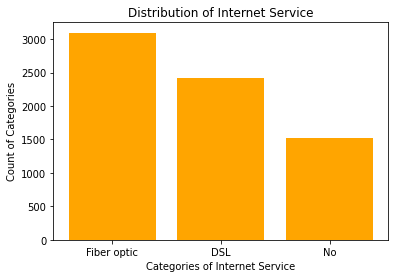

In [14]:
X = df['InternetService'].value_counts().keys().tolist()
Y = df['InternetService'].value_counts().tolist()
plt.bar(X,Y,color = 'orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')

Text(0.5, 1.0, 'Distribution of tenure')

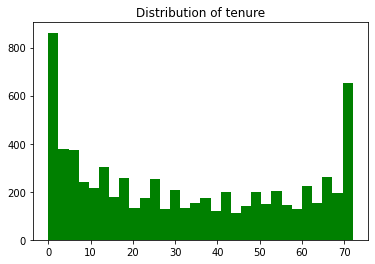

In [15]:
plt.hist(df['tenure'],bins = 30, color = 'green')
plt.title("Distribution of tenure")

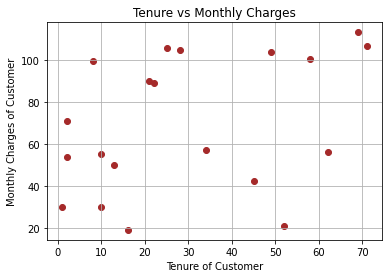

In [16]:
plt.scatter(df['tenure'].head(20),df['MonthlyCharges'].head(20),color='brown')
plt.xlabel('Tenure of Customer')
plt.ylabel('Monthly Charges of Customer')
plt.title('Tenure vs Monthly Charges')
plt.grid(True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


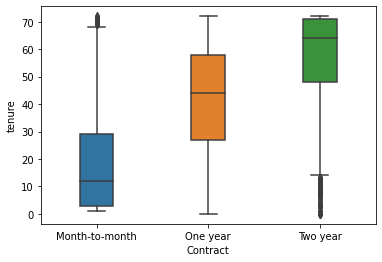

In [17]:
sns.boxplot('Contract','tenure', data=df, width=0.3)

In [18]:
linearRegression_x = pd.DataFrame(df['tenure'])
linearRegression_y = df['MonthlyCharges']

In [19]:
linearRegression_x_train,linearRegression_x_test,linearRegression_y_train,linearRegression_y_test = train_test_split(linearRegression_x,linearRegression_y, test_size=0.3,random_state =0)

In [20]:
linearRegression = LinearRegression()
linearRegression.fit(linearRegression_x_train,linearRegression_y_train)

LinearRegression()

In [21]:
linearRegression_y_pred = linearRegression.predict(linearRegression_x_test)

In [22]:
mse = mean_squared_error(linearRegression_y_pred, linearRegression_y_test)
rmse = np.sqrt(mse)
rmse

29.394584027273893

In [23]:
logisticRegression_x = pd.DataFrame(df['MonthlyCharges'])
logisticRegression_y = df['Churn']

In [24]:
logisticRegression_x_train,logisticRegression_x_test,logisticRegression_y_train,logisticRegression_y_test = train_test_split(logisticRegression_x,logisticRegression_y,train_size=0.65,random_state=0)

In [25]:
logisticRegression = LogisticRegression()
logisticRegression.fit(logisticRegression_x_train,logisticRegression_y_train)

LogisticRegression()

In [26]:
logisticRegression_y_pred = logisticRegression.predict(logisticRegression_x_test)

In [27]:
logisticRegression_cm = confusion_matrix(logisticRegression_y_pred,logisticRegression_y_test)
logisticRegression_cm

array([[1815,  651],
       [   0,    0]])

In [28]:
logisticRegression_score = accuracy_score(logisticRegression_y_pred,logisticRegression_y_test)
logisticRegression_score

0.7360097323600974

In [29]:
multipleLogisticRegression_x = pd.DataFrame(df.loc[:,['MonthlyCharges','tenure']])
multipleLogisticRegression_y = df['Churn']

In [30]:
multipleLogisticRegression_x_train,multipleLogisticRegression_x_test,multipleLogisticRegression_y_train,multipleLogisticRegression_y_test = train_test_split(multipleLogisticRegression_x,multipleLogisticRegression_y,train_size=0.80,random_state=0)

In [31]:
multipleLogisticRegression = LogisticRegression()
multipleLogisticRegression.fit(multipleLogisticRegression_x_train,multipleLogisticRegression_y_train)

LogisticRegression()

In [32]:
multipleLogisticRegression_y_pred = multipleLogisticRegression.predict(multipleLogisticRegression_x_test)

In [33]:
multipleLogisticRegression_cm = confusion_matrix(multipleLogisticRegression_y_pred,multipleLogisticRegression_y_test)
multipleLogisticRegression_cm

array([[934, 212],
       [107, 156]])

In [34]:
multipleLogisticRegression_score = accuracy_score(multipleLogisticRegression_y_pred,multipleLogisticRegression_y_test)
multipleLogisticRegression_score

0.7735982966643009

In [35]:
decisionTreeClassifier_x = pd.DataFrame(df['tenure'])
decisionTreeClassifier_y = df['Churn']

In [36]:
decisionTreeClassifier_x_train, decisionTreeClassifier_x_test, decisionTreeClassifier_y_train, decisionTreeClassifier_y_test = train_test_split(decisionTreeClassifier_x, decisionTreeClassifier_y, test_size=0.20, random_state = 0)  

In [37]:
decisionTreeClassifier = DecisionTreeClassifier()  
decisionTreeClassifier.fit(decisionTreeClassifier_x_train, decisionTreeClassifier_y_train)

DecisionTreeClassifier()

In [38]:
decisionTreeClassifier_y_pred = decisionTreeClassifier.predict(decisionTreeClassifier_x_test)  

In [39]:
decisionTreeClassifier_cm = confusion_matrix(decisionTreeClassifier_y_pred,
                                             decisionTreeClassifier_y_test)
decisionTreeClassifier_cm

array([[965, 281],
       [ 76,  87]])

In [40]:
decisionTreeClassifier_score = accuracy_score(decisionTreeClassifier_y_pred,
                                              decisionTreeClassifier_y_test)
decisionTreeClassifier_score

0.7466288147622427

In [41]:
randomForestClassifier_x = df[['tenure','MonthlyCharges']]
randomForestClassifier_y = df['Churn']

In [42]:
randomForestClassifier_x_train, randomForestClassifier_x_test, randomForestClassifier_y_train, randomForestClassifier_y_test = train_test_split(randomForestClassifier_x,randomForestClassifier_y, test_size=0.20,random_state = 0) 

In [43]:
randomForestClassifier = RandomForestClassifier(n_estimators=100)
randomForestClassifier.fit(randomForestClassifier_x_train,randomForestClassifier_y_train)

RandomForestClassifier()

In [44]:
randomForestClassifier_y_pred = randomForestClassifier.predict(randomForestClassifier_x_test)

In [45]:
randomForestClassifier_cm = confusion_matrix(randomForestClassifier_y_pred,randomForestClassifier_y_test)
randomForestClassifier_cm

array([[885, 226],
       [156, 142]])

In [46]:
randomForestClassifier_score = accuracy_score(randomForestClassifier_y_pred,randomForestClassifier_y_test)
randomForestClassifier_score

0.7288857345635202